In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils


In [2]:
path_to_files = "test_load/"
dfCRY5_POS = pd.read_hdf(path_to_files + "CRY5loPOS.h5").query('(lyield==17000)')
dfCRY5 = pd.read_hdf(path_to_files + "CRY5lo.h5").query('(lyield==17000)')

In [3]:
var_dict = utils.getVarList('allCRY5')
var_dict

{'crvinfo_x': [-8000, 1000],
 'crvinfo_y': [0, 3500],
 'crvinfo_z': [-5000, 20000],
 'de_nhits': [0, 100],
 'ue_nhits': [0, 100],
 'dequal_TrkPID': [-1.1, 1.1],
 'dequal_TrkQual': [-0.1, 1.1],
 'deent_td': [0, 3],
 'deent_d0': [-500, 500],
 'crvinfo_PEs': [-1, 1000],
 'crvinfo_dT': [-200, 100],
 'deent_mom': [50, 200]}

In [4]:
var_dict['deent_td'] = [0,2]

## trkana NEG

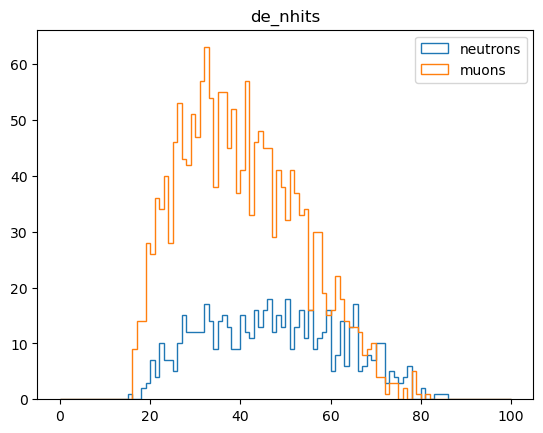

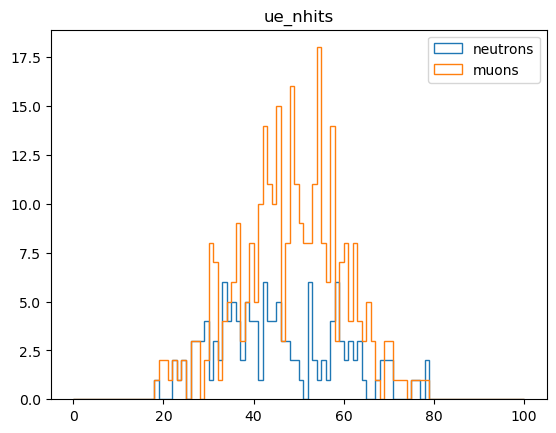

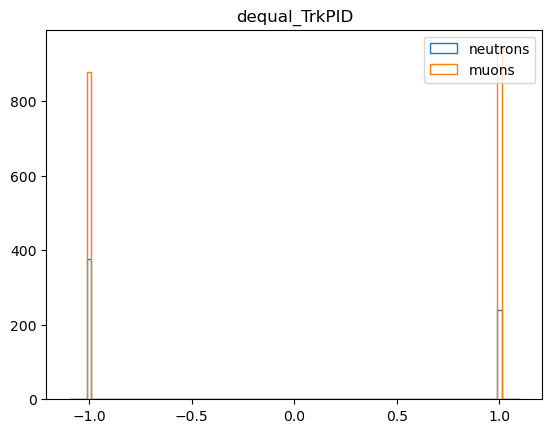

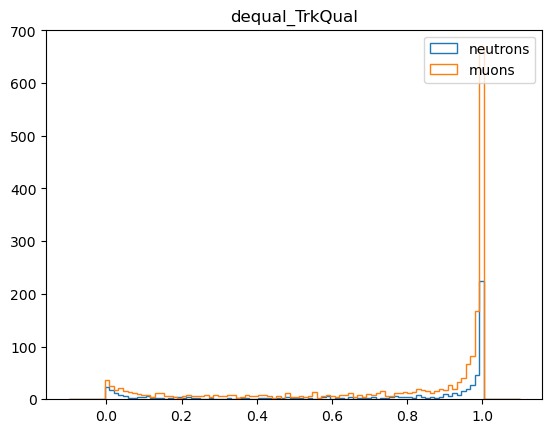

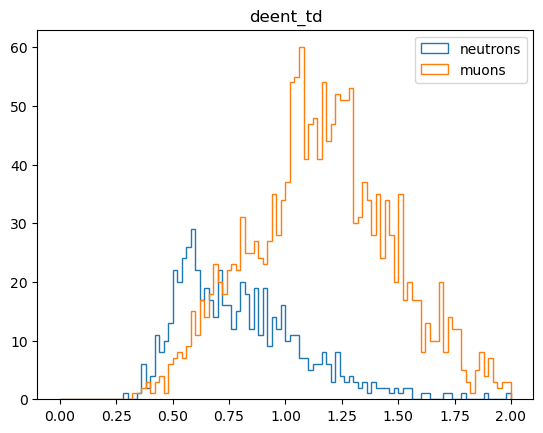

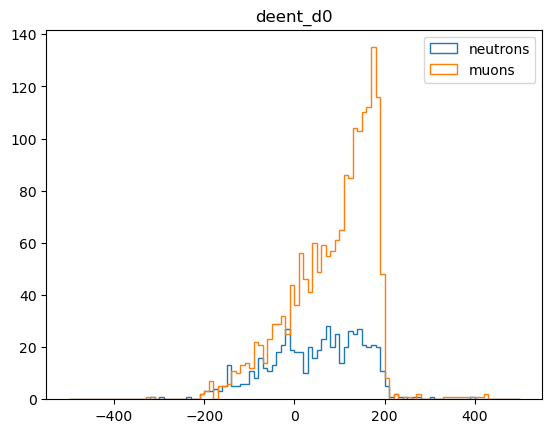

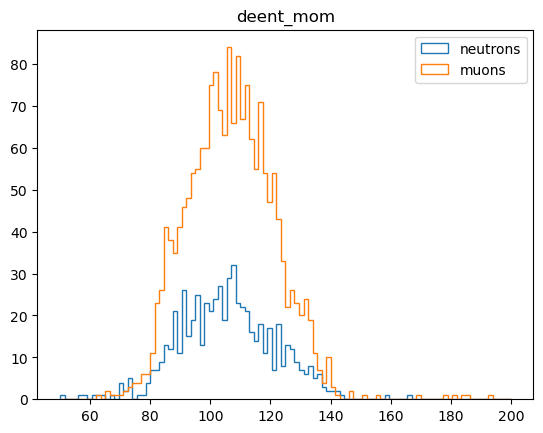

In [5]:
for var in var_dict.keys():
    if "crvinfo" in var: 
        continue
    plt.figure()
    plt.title(var)
    plt.hist(dfCRY5.query('demcpri_pdg==2112  & de_t0 > 600 & debestcrv_timeWindowStart==0')[var], bins=100, range=var_dict[var], histtype='step', label='neutrons');
    plt.hist(dfCRY5.query('abs(demcpri_pdg)==13 & de_t0 > 600 & debestcrv_timeWindowStart==0')[var], bins=100, range=var_dict[var], histtype='step', label='muons');
    # plt.yscale('log')
    plt.legend()

## trkana POS

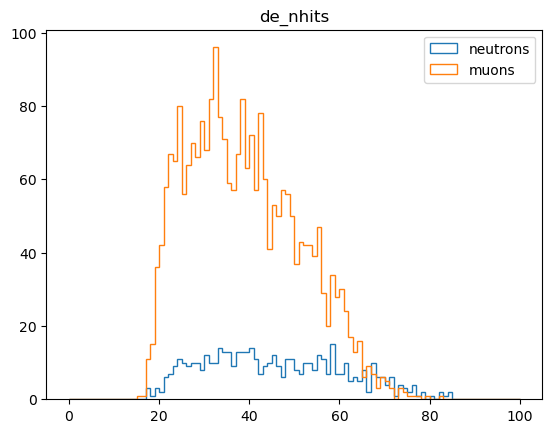

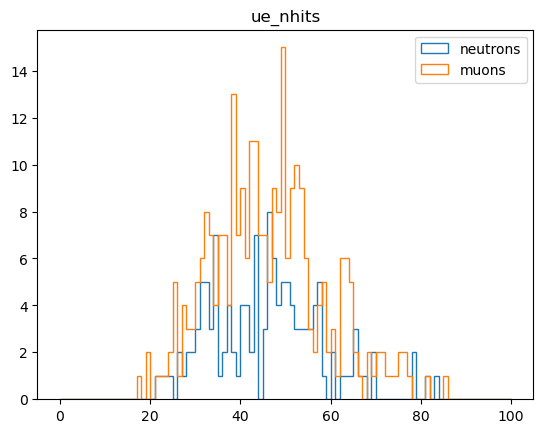

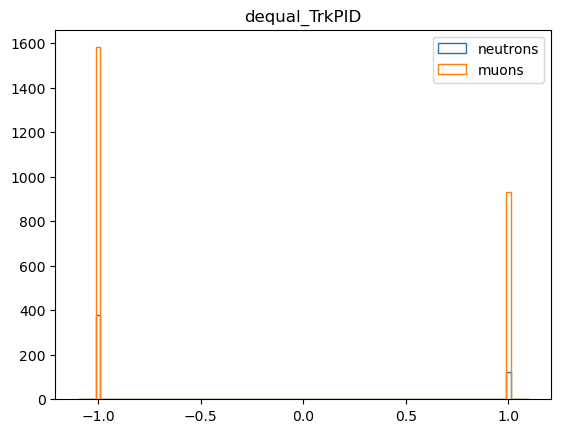

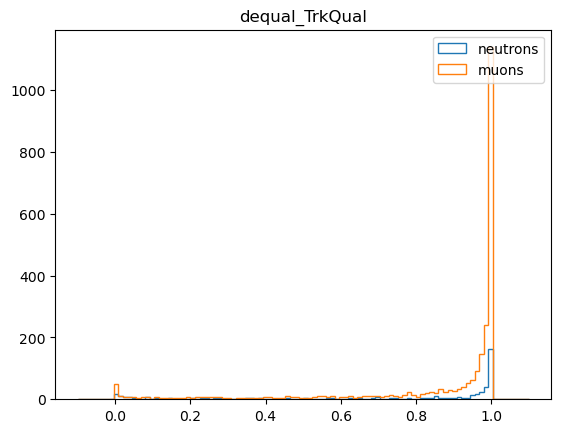

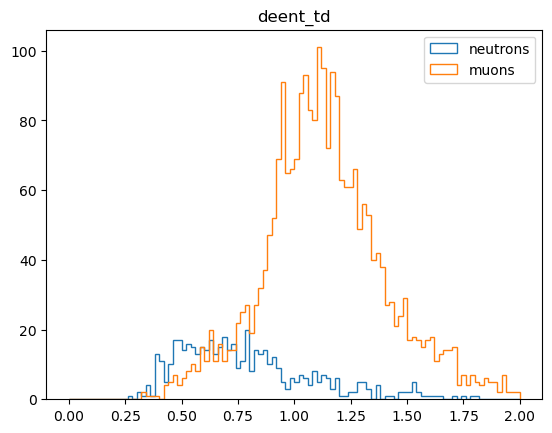

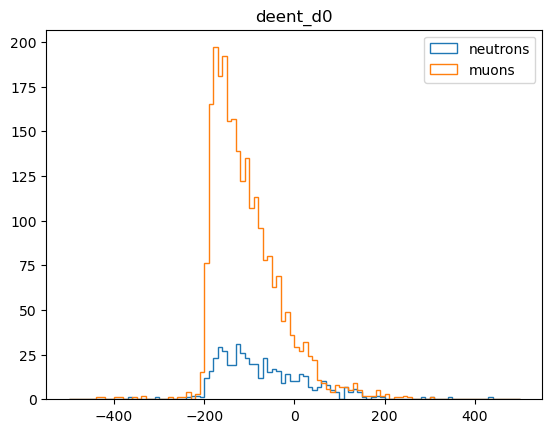

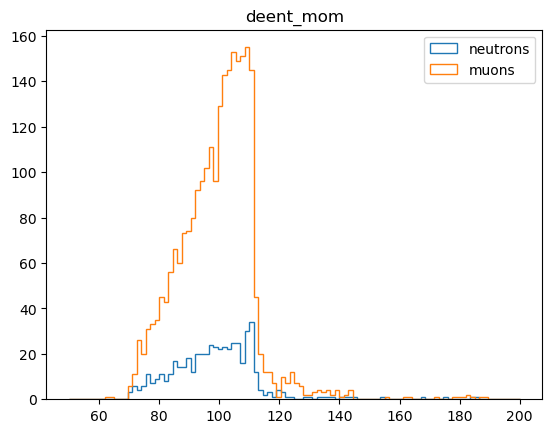

In [7]:
for var in var_dict.keys():
    if "crvinfo" in var: 
        continue
    plt.figure()
    plt.title(var)
    plt.hist(dfCRY5_POS.query('demcpri_pdg==2112  & de_t0 > 600 & debestcrv_timeWindowStart==0')[var], bins=100, range=var_dict[var], histtype='step', label='neutrons');
    plt.hist(dfCRY5_POS.query('abs(demcpri_pdg)==13 & de_t0 > 600 & debestcrv_timeWindowStart==0')[var], bins=100, range=var_dict[var], histtype='step', label='muons');
    # plt.yscale('log')
    plt.legend()